In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [41]:
# loaded dataset & displayed to make sure it is filling, and determine structure of DB
df = pd.read_csv('vgsales.csv')
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [42]:
df = df.drop(['Rank', 'Name', 'Publisher'], axis=1)
X = df.drop('Global_Sales', axis=1)
print(X.dtypes)
df = df.drop(['Other_Sales', 'JP_Sales'], axis=1) #added JP_Sales to reduce input granularity


Platform        object
Year           float64
Genre           object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


In [43]:

le_platform = LabelEncoder()
le_genre = LabelEncoder()

df = df.dropna()

df['Platform'] = le_platform.fit_transform(df['Platform'])
df['Genre'] = le_genre.fit_transform(df['Genre'])

X = df.drop('Global_Sales', axis=1)
y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Model 2: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Model 3: SVR scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train_s, y_train_s)
svr_preds = svr.predict(X_test_s)

# Model 4: K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

In [44]:
def evaluate(model_name, y_true, y_pred):
    print(f"{model_name}")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R^2:", r2_score(y_true, y_pred))
    print('-' * 30)

evaluate("Linear Regression", y_test, lr_preds)
evaluate("Random Forest", y_test, rf_preds)
evaluate("Support Vector Regressor", y_test_s, svr_preds)
evaluate("K-Nearest Neighbors", y_test, knn_preds)

Linear Regression
MSE: 0.10202310436186549
R^2: 0.9761212060322462
------------------------------
Random Forest
MSE: 0.7926696460236308
R^2: 0.8144734442234282
------------------------------
Support Vector Regressor
MSE: 2.63561944324174
R^2: 0.3831258707895209
------------------------------
K-Nearest Neighbors
MSE: 1.2530354194733617
R^2: 0.7067235426421079
------------------------------


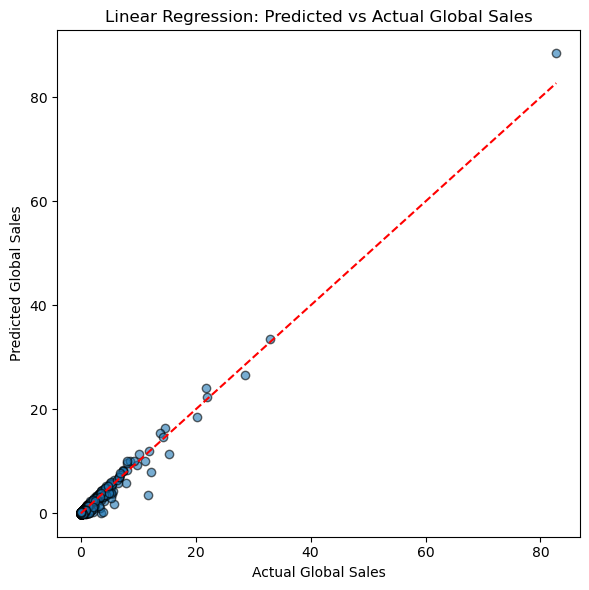

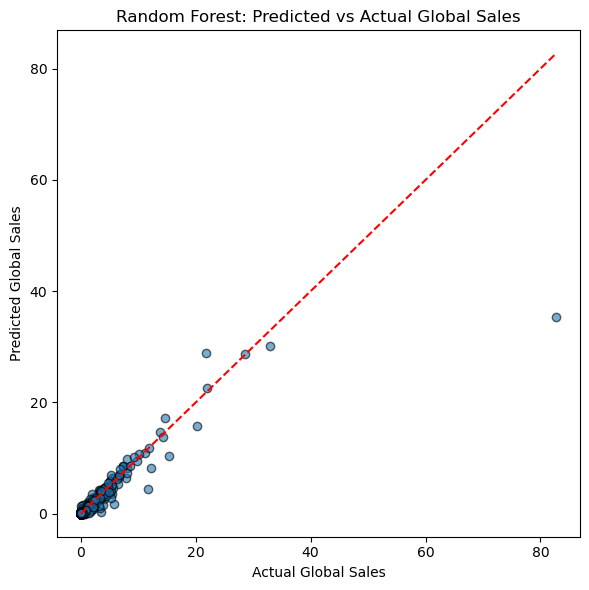

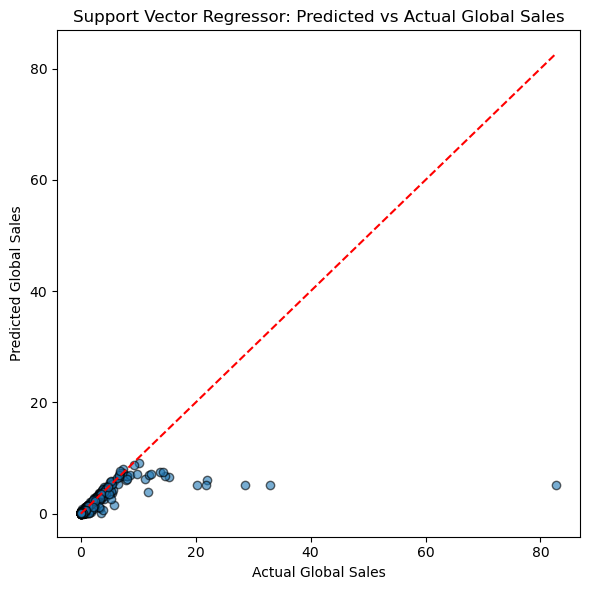

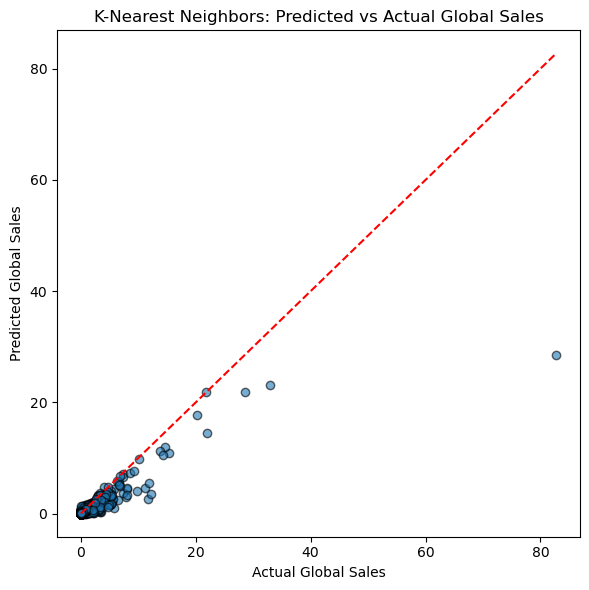

In [54]:
# Predicted vs Actual Plot
def plot_pred_vs_actual(model_name, y_true, y_pred):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.title(f'{model_name}: Predicted vs Actual Global Sales')
    plt.xlabel('Actual Global Sales')
    plt.ylabel('Predicted Global Sales')
    plt.tight_layout()
    plt.show()

plot_pred_vs_actual("Linear Regression", y_test, lr_preds)
plot_pred_vs_actual("Random Forest", y_test, rf_preds)
plot_pred_vs_actual("Support Vector Regressor", y_test_s, svr_preds)
plot_pred_vs_actual("K-Nearest Neighbors", y_test, knn_preds)


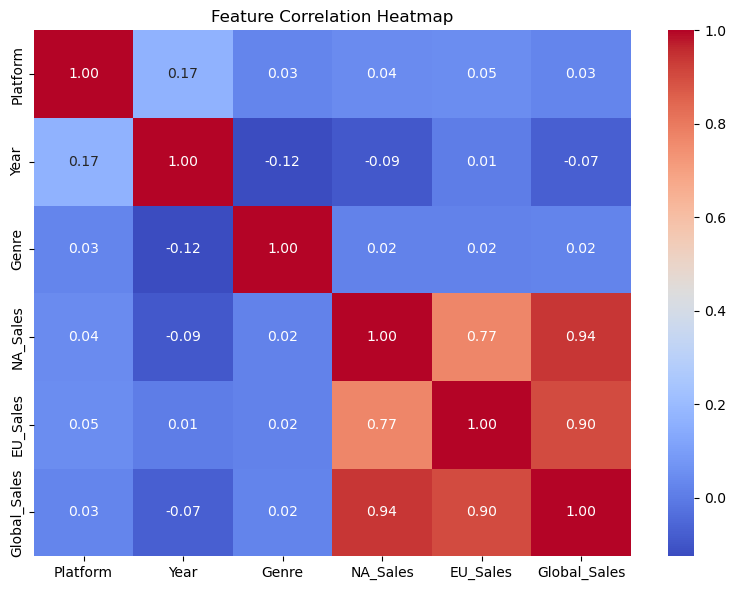

In [31]:
# Correlation heatmap of features + target
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [48]:
# Comparison Table
results = {
    "Model": [
        "Linear Regression", 
        "Random Forest Regressor", 
        "SVR", 
        "K-Nearest Neighbors"
    ],
    "MSE": [
        mean_squared_error(y_test, lr_preds),
        mean_squared_error(y_test, rf_preds),
        mean_squared_error(y_test_s, svr_preds),
        mean_squared_error(y_test, knn_preds)
    ],
    "R² Score": [
        r2_score(y_test, lr_preds),
        r2_score(y_test, rf_preds),
        r2_score(y_test_s, svr_preds),
        r2_score(y_test, knn_preds)
    ]
}

results_df = pd.DataFrame(results)
display(results_df)


,Model,MSE,R² Score
0,Linear Regression,0.102023,0.976121
1,Random Forest Regressor,0.792670,0.814473
2,SVR,2.635619,0.383126
3,K-Nearest Neighbors,1.253035,0.706724


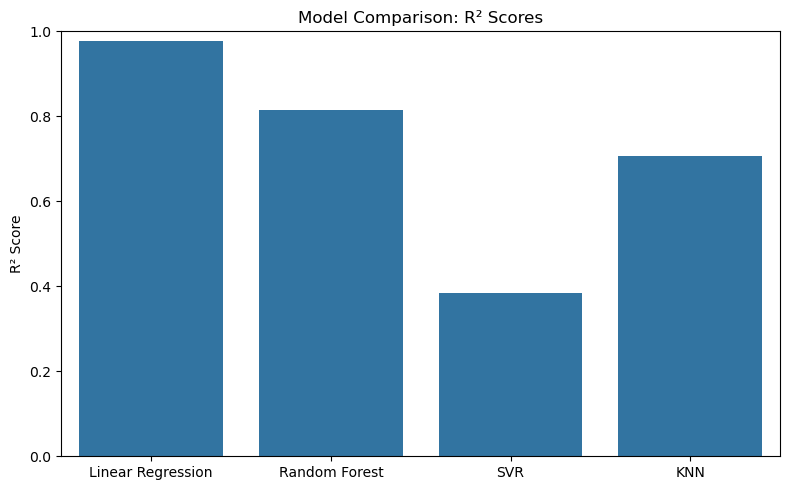

In [46]:
# Visual model comparison
model_names = list(models.keys())
r2_scores = [r2_score(y_test, preds) for preds in models.values()]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=r2_scores)
plt.title("Model Comparison: R² Scores")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


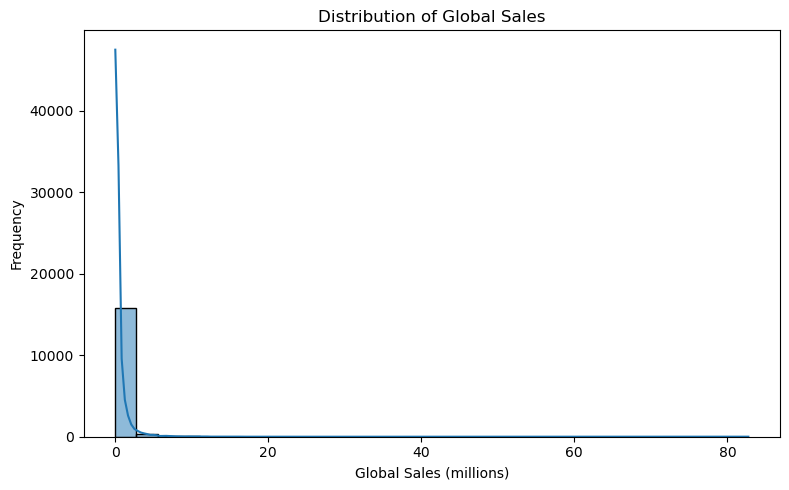

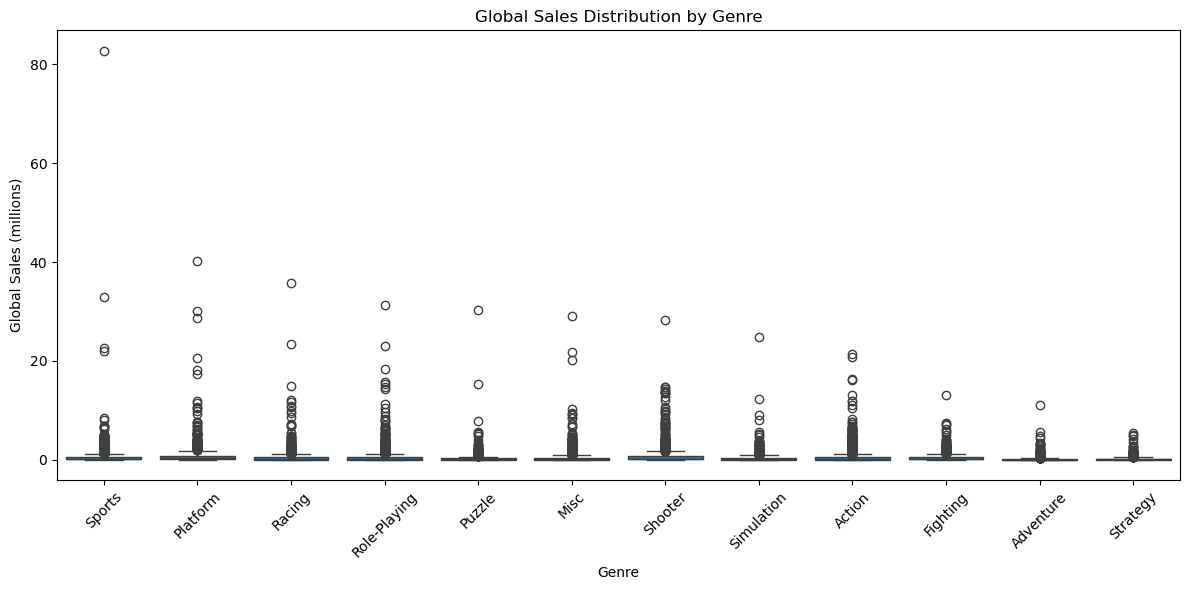

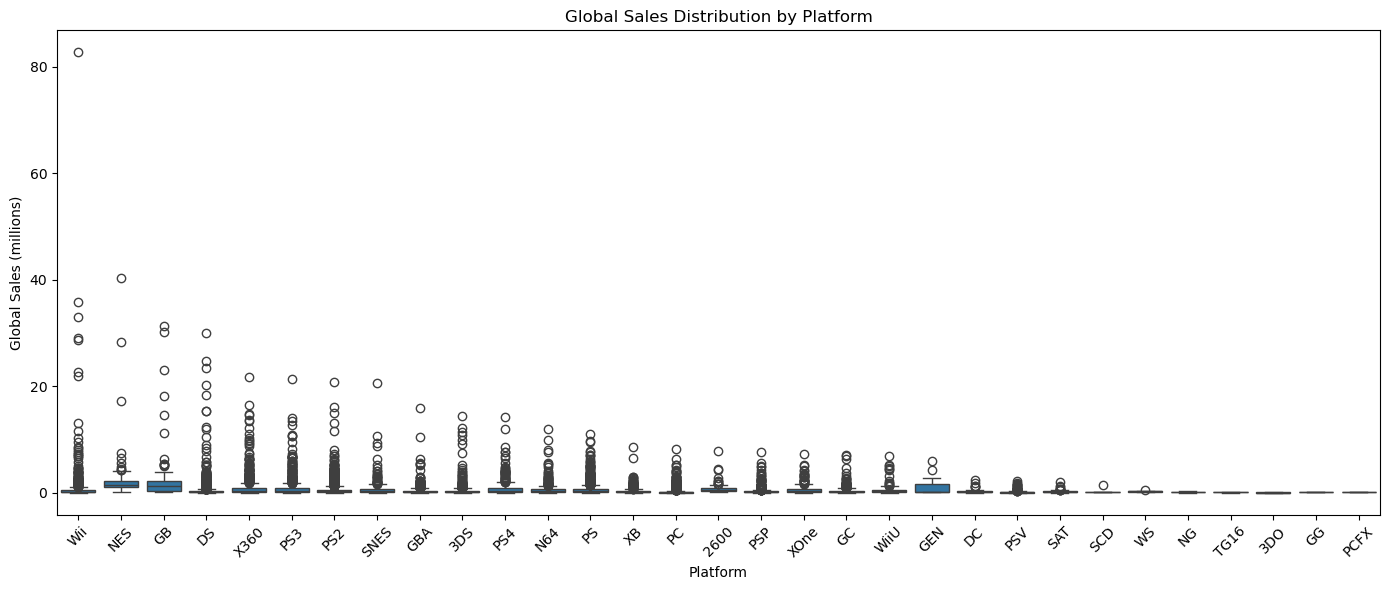

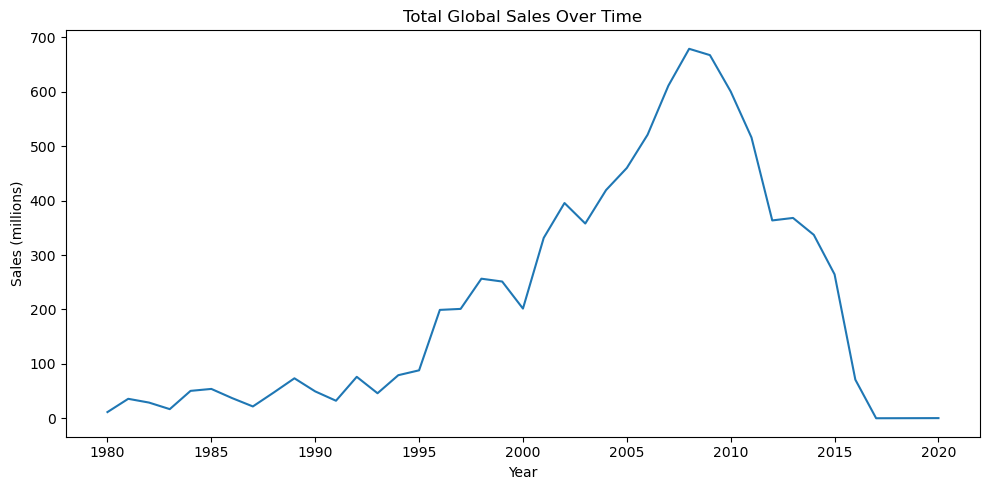

In [53]:
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

genre_mapping = dict(zip(le_genre.transform(le_genre.classes_), le_genre.classes_))
df_plot = df.copy()
df_plot['Genre_Label'] = df_plot['Genre'].map(genre_mapping)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre_Label', y='Global_Sales', data=df_plot)
plt.xticks(rotation=45)
plt.title("Global Sales Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

platform_mapping = dict(zip(le_platform.transform(le_platform.classes_), le_platform.classes_))
df_plot['Platform_Label'] = df_plot['Platform'].map(platform_mapping)

plt.figure(figsize=(14, 6))
sns.boxplot(x='Platform_Label', y='Global_Sales', data=df_plot)
plt.xticks(rotation=45)
plt.title("Global Sales Distribution by Platform")
plt.xlabel("Platform")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df.groupby("Year")["Global_Sales"].sum())
plt.title("Total Global Sales Over Time")
plt.ylabel("Sales (millions)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()